<a href="https://colab.research.google.com/github/nacho-pancho/darset/blob/master/demo_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#
# dependencias
#
import os
os.system('cd ../data')
os.system('./get_data.sh')
os.system('cd ../code')
print('Listo')
#
# cargamos modulos
#
import archivos
import filtros
import graficas

Listo


Leyendo archivo SMEC  para la central 5
Leyendo archivo scada de central 5: ../data//c5/c5_series10min.sas
9	NSeries								

H	meteo_utm_zona								

H	meteo_utm_zona								

dt: min0:09:59.616000 med=0:09:59.616002 max=0:10:00.480000
Leyendo archivo gen de central 5: ../data//c5/c5_series10minGen.sas
9	NSeries								

H	meteo_utm_zona								

H	meteo_utm_zona								

dt: min0:09:37.670400 med=0:09:59.961600 max=0:10:00.480000
Leyendo archivo de pronósticos para la central 5
tini=2015-10-01 00:00:00 tfin=2019-05-31 23:50:00 period=1338 days, 23:50:00
t_per_pixel=16:04:04.500000
potSCADA
potSMEC10m
cgmSCADA
velSCADA
dirSCADA
velPRONOS
dirPRONOS
velGEN
redraw
window: (datetime.datetime(2015, 10, 1, 0, 0), datetime.datetime(2015, 10, 8, 0, 0))
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:30:00 2015-10-07 23:50:00


/usr/lib64/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
{'pot': ['potSCADA', 'potSMEC10m'], 'vel': ['velSCADA', 'velPRONOS', 'velGEN'], 'cgm': ['cgmSCADA'], 'dir': ['dirSCADA', 'dirPRONOS']}
0 10


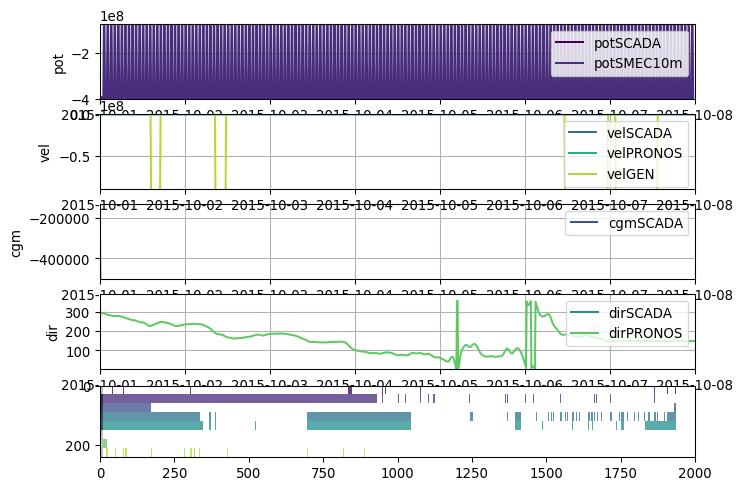

In [2]:
import matplotlib.pyplot as plt

nidCentral = 5
med_10min, med_15min = archivos.leerArchiSMEC(nidCentral)
parque = archivos.leerArchi(nidCentral,'scada')
parque2 = archivos.leerArchi(nidCentral,'gen') 
medidor_pronos10min = archivos.leerArchiPRONOS(nidCentral,10)

parque.pot_SMEC  = med_10min

vel_SCADA = parque.medidores[0].get_medida('vel')
dir_SCADA = parque.medidores[0].get_medida('dir')
vel_GEN = parque2.medidores[0].get_medida('vel')

vel_pronos10min = medidor_pronos10min.get_medida('vel')
dir_pronos10min = medidor_pronos10min.get_medida('dir')


#filtro_total = dir_SCADA.filtrada()

meds = []
meds.append(parque.pot)
meds.append(parque.pot_SMEC)
meds.append(parque.cgm)

meds.append(vel_SCADA)
meds.append(dir_SCADA)

meds.append(vel_pronos10min)
meds.append(dir_pronos10min)

meds.append(vel_GEN)


plt.close('all')
graficas.clickplot(meds)
plt.show()

